# Language Identification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**LETHABO, KGATUKE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. From South African Government

. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [236]:
# Libraries for data loading, data manipulation and data visulisation

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries for data preparation and model building
import nltk



%matplotlib inline
import seaborn as sns
import re
import string

from nltk.tokenize import word_tokenize, TreebankWordTokenizer
# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, log_loss

# eda 
#from wordcloud import WordCloud,ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
# set plot style
sns.set()

#import scikitplot as skplt
# Ingnore warnings
import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
# Setting global constants to ensure notebook results are reproducible

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [237]:

df_train = pd.read_csv("train_set.csv")
df_test = pd.read_csv("test_set.csv")

#Insurance dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

In [238]:
df = df_train.copy()
dft = df_test.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [239]:
# look at data 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [240]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [241]:
# plot relevant feature interactions
df_train.describe()


,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [242]:
# evaluate correlation
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [243]:
print(df_train['lang_id'].unique())

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


In [244]:
#Number of languages
df_train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [245]:
df_train['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

6.0
4.0


<AxesSubplot:ylabel='lang_id'>

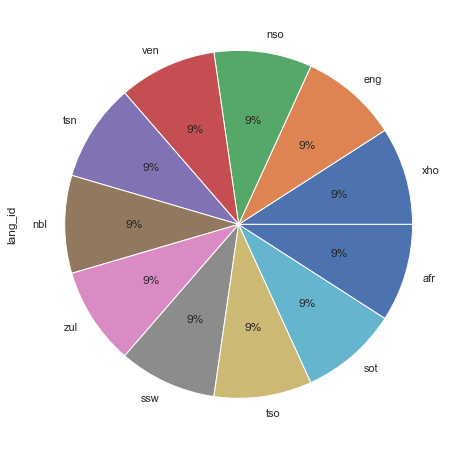

In [246]:
#Analysing language
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
df_train.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')


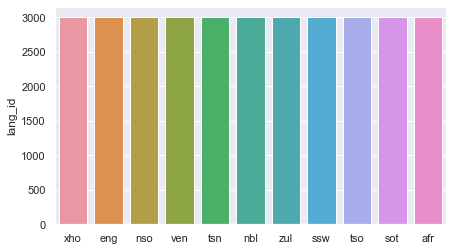

In [247]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=df_train, x=df_train['lang_id'].unique(), y=df_train['lang_id'].value_counts())
plt.show()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [248]:
# remove missing values/ features
print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (33000, 2)  |  Test data shape: (5682, 2)


In [249]:
#checking nulls
print('There are ', np.sum(df_train.isnull().any(axis=1)), ' null values in the dataset.')

There are  0  null values in the dataset.


In [250]:
print('There are ', df_train.duplicated().sum(), ' duplicated values in the dataset.')

There are  3052  duplicated values in the dataset.


In [251]:
#missing values
df_train.isna().info

<bound method DataFrame.info of        lang_id   text
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
32995    False  False
32996    False  False
32997    False  False
32998    False  False
32999    False  False

[33000 rows x 2 columns]>

In [252]:
#checking total number of null values for train
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [253]:
# engineer existing features
#Summary statistics

df_train[['lang_id']].describe().T

,count,unique,top,freq
lang_id,33000,11,xho,3000


In [254]:
#checking unique target values
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [255]:
df_train[['text']].describe().T

,count,unique,top,freq
text,33000,29948,ngokwesekhtjheni yomthetho ophathelene nalokhu...,17


In [256]:
#checking unique target values
df_train['text'].unique()

array(['umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika',
       'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo',
       'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months',
       ...,
       'closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the ab

In [257]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])


In [258]:
df_train['clean_text'] = df_train['text'].apply(remove_punctuation)



In [264]:
#Tokenization

# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
df_train['clean_text'] = df_train['clean_text'].apply(tokenizer.tokenize)

# Display the DataFrame after Tokenization:
df_train.head()


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [265]:
# Define Function to Remove Stopwords:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]



In [266]:
# Removing StopWords from the data:
df_train['clean_text'] = df_train['clean_text'].apply(chop_stopwords)


In [267]:
#Lemmatization

# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
df_train['clean_text'] = df_train['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
df_train.head()


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [268]:
# Revert back to sentence:
for i in range(len(df_train['clean_text'])):
    df_train['clean_text'][i] = " ".join(df_train['clean_text'][i])

# Display Dataframe:
df_train.head()


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [269]:
#splitting data
# Define Features and Labels:
X = df_train['clean_text'] # Features
y = df_train['lang_id'] # Labels


In [270]:
# Tain - Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)



In [271]:
# Creating Instance of Model:
# Evaluating Naive Bayes Model:



In [272]:
df_test['clean_text'] = df_test['text'].apply(remove_punctuation)


In [273]:
# Converting text into Tokens(word-lists):
df_test['clean_text'] = df_test['text'].apply(tokenizer.tokenize)
df_test.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, a, a, kgethegileng, ..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


In [274]:
df_test['clean_text'] = df_test['clean_text'].apply(chop_stopwords)

In [275]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
df_test['clean_text'] = df_test['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
df_test.head()


,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, kgethegileng, letlel..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


In [276]:
# Revert back to sentence:
for i in range(len(df_test['clean_text'])):
    df_test['clean_text'][i] = " ".join(df_test['clean_text'][i])
df_test.head()


,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","Mmasepala , fa maemo kgethegileng letlelela kg..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu .
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta .


In [277]:
df_test['clean_text'] = df_test['clean_text'].apply(remove_punctuation)
df_test.head()


,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo kgethegileng letlelela kga...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


In [278]:
# fit_transform extract features:
X = vect.fit_transform(X)

NameError: name 'vect' is not defined

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.text)
X_test_counts = count_vect.transform(dft['text'])
X_train_counts.shape

In [279]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)
X_train_tf.shape

(33000, 141958)

In [280]:
# create targets and features dataset
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts) 
X_train_tf.shape

(33000, 141958)

In [281]:
X = X_train_tf
y = df['lang_id']

In [282]:
X_test_counts.shape

(5682, 141958)

In [283]:

X = X_train_tf
y = df['lang_id']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =50)

In [285]:
#Logistic Regression
log_reg =LogisticRegression(multi_class='auto', penalty='l2' , C=1.0,max_iter = 100, verbose=0 ,solver ='saga')

In [286]:
log = log_reg.fit(X_train, y_train)
y_prediction_reg = log_reg.predict(X_test)

In [287]:
print('Logistic regression Report')
print(classification_report(y_test, y_prediction_reg))

Logistic regression Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       1.00      1.00      1.00       595
         nbl       0.99      0.98      0.98       594
         nso       1.00      0.99      1.00       581
         sot       1.00      1.00      1.00       600
         ssw       0.99      1.00      0.99       601
         tsn       1.00      1.00      1.00       609
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       0.98      1.00      0.99       606
         zul       0.98      0.98      0.98       598

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [288]:
dft['lang_id'] = log_reg.predict(X_test_counts)

letkay = dft[['index','lang_id']]
letkay.to_csv('Sub2.csv', index = False)

In [289]:
letkay.shape

(5682, 2)